In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '/home/swei20/PIML_v1/'
import sys
sys.path.insert(0, PROJECT_PATH)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from PIML.gateway.loaderIF.baseloaderIF import SpecGridLoaderIF


In [88]:
GRID_PATH="/datascope/subaru/user/swei20/data/pfsspec/import/stellar/grid"
DATA_PATH=os.path.join(GRID_PATH, "bosz_5000_RHB.h5")

In [89]:
loader = SpecGridLoaderIF()

In [90]:
loader.set_data_path(DATA_PATH)

In [91]:
SpecGrid = loader.load()

In [92]:
SpecGrid.flux.shape

(2880, 15404)

# TESTING

In [5]:
from test.testbase import DataInitializer

In [6]:
D = DataInitializer()

In [15]:
D.SPEC_GRID_PARAMS

{'object': {'DATA_PATH': '/datascope/subaru/user/swei20/data/pfsspec/import/stellar/grid/bosz_5000_RHB.h5'},
 'data': {'SKY_PATH': '/home/swei20/PIML_v1/test/testdata/wavesky.npy',
  'Sky': <PIML.crust.data.specdata.basesky.StellarSky at 0x7fdef0b6e460>},
 'op': {'box_name': 'R', 'arm': 'RedM', 'step': 10, 'wave_rng': [7100, 8850]},
 'model': {'Resolution': 'Alex', 'Interp': 'RBF'}}

In [37]:
from PIML.gateway.processIF.specgridprocessIF.basespecgridprocessIF import StellarSpecGridProcessIF

In [39]:
SP = StellarSpecGridProcessIF()
SP.interact(t.PARAMS)
Ob = SP.Object

In [59]:
Ob.map_snr( [10,20,30])

array([156.77460792,  78.38744601,  47.03249602])

In [8]:
from PIML.crust.process.baseprocess import StellarSpecProcess


In [94]:
np.random.seed(922)
SSP = StellarSpecProcess()
SSP.set_process(D.OP_PARAMS, D.OP_MODELS, D.OP_DATA)
SSP.start(SpecGrid)

In [95]:
SpecGrid.map_snr( [10,20,30])

array([156.77548358,  78.38766493,  47.03258358])

In [40]:
flux = SP.Object.flux

In [11]:
from PIML.surface.posteval.evalstellarprocess import EvalStellarSpecGridProcess

In [16]:
# e = EvalStellarProcess(SP=SP)
e = EvalStellarSpecGridProcess(PARAMS=D.SPEC_GRID_PARAMS)

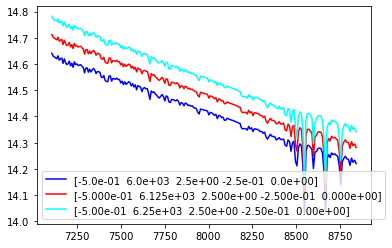

In [17]:
e.eval_interpolator()

In [20]:
Ob = e.SpecGrid

In [22]:
Ob.interpolator(Ob.coord[D.midx], scale=1)

array([14.64081256, 14.63051247, 14.62756459, 14.62350759, 14.61977863,
       14.63099483, 14.61437719, 14.61958175, 14.62262461, 14.60207067,
       14.61946987, 14.60595685, 14.59775319, 14.60087678, 14.61094353,
       14.59294374, 14.60264432, 14.58735801, 14.60838994, 14.59763427,
       14.60041616, 14.59385789, 14.59614192, 14.5974467 , 14.5907353 ,
       14.58694198, 14.56619525, 14.58409447, 14.5852576 , 14.56880225,
       14.58008498, 14.56942823, 14.57758661, 14.58276285, 14.57666212,
       14.56320274, 14.57134142, 14.57067433, 14.56788845, 14.54979488,
       14.54830144, 14.55610891, 14.53741039, 14.5333162 , 14.53252074,
       14.55374582, 14.55471083, 14.5349442 , 14.54452669, 14.54394766,
       14.54148304, 14.54615581, 14.54034534, 14.54090225, 14.52798967,
       14.53440833, 14.52142094, 14.5318419 , 14.52233379, 14.52729793,
       14.5320666 , 14.52966063, 14.51647213, 14.52453109, 14.51239076,
       14.52054184, 14.50168851, 14.51776613, 14.51425206, 14.51

In [23]:
interp_coordx = np.copy(Ob.coordx[D.midx])

In [24]:
interp_coordx[1] += 0.5 

In [25]:
interp_coordx

array([2. , 2.5, 1. , 2. , 1. ])

In [148]:
import pickle
with open('data.pickle', 'wb') as f:
    # Write object `ip` to file
    pickle.dump(Ob.interpolator, f, pickle.HIGHEST_PROTOCOL)

AttributeError: Can't pickle local object 'RBFInterpSpecGridModel.apply_on_SpecGrid.<locals>.interpolator'

In [28]:
from scipy.interpolate import RBFInterpolator


In [29]:
interp = RBFInterpolator(Ob.coordx, Ob.logflux, kernel="gaussian", epsilon=0.5)


In [30]:
import pickle
with open('data.pickle', 'wb') as f:
    # Write object `ip` to file
    pickle.dump(interp, f, pickle.HIGHEST_PROTOCOL)

In [31]:
with open('data.pickle', 'rb') as f:
    # Read out object `ip` from file
    ip = pickle.load(f)

In [32]:
aaa=np.array([interp_coordx])

In [33]:
ip(aaa)

array([[14.71221238, 14.70254542, 14.69836966, 14.69541416, 14.69225459,
        14.70216577, 14.68643852, 14.69115949, 14.69386743, 14.67431404,
        14.690642  , 14.67827186, 14.67000655, 14.67318688, 14.68189303,
        14.66516853, 14.67366377, 14.65893685, 14.67858126, 14.66854098,
        14.67062753, 14.66455261, 14.66690356, 14.66737625, 14.66093744,
        14.65749576, 14.6379182 , 14.65450016, 14.65527085, 14.63903774,
        14.64966506, 14.63978099, 14.64715553, 14.65174276, 14.64604444,
        14.63336259, 14.64068023, 14.63977277, 14.63694825, 14.62016487,
        14.61848898, 14.62579247, 14.60732836, 14.60370547, 14.60257223,
        14.62221837, 14.6230401 , 14.6043839 , 14.61285454, 14.61228638,
        14.60953997, 14.61414655, 14.60831272, 14.60897422, 14.5964719 ,
        14.60253035, 14.58973756, 14.59928204, 14.59084901, 14.59504295,
        14.59919677, 14.59675585, 14.58428782, 14.59153711, 14.58033932,
        14.58746764, 14.56989277, 14.58453409, 14.5

In [34]:
Ob.interpolator(interp_coordx, scale=0)

array([14.71221238, 14.70254542, 14.69836966, 14.69541416, 14.69225459,
       14.70216577, 14.68643852, 14.69115949, 14.69386743, 14.67431404,
       14.690642  , 14.67827186, 14.67000655, 14.67318688, 14.68189303,
       14.66516853, 14.67366377, 14.65893685, 14.67858126, 14.66854098,
       14.67062753, 14.66455261, 14.66690356, 14.66737625, 14.66093744,
       14.65749576, 14.6379182 , 14.65450016, 14.65527085, 14.63903774,
       14.64966506, 14.63978099, 14.64715553, 14.65174276, 14.64604444,
       14.63336259, 14.64068023, 14.63977277, 14.63694825, 14.62016487,
       14.61848898, 14.62579247, 14.60732836, 14.60370547, 14.60257223,
       14.62221837, 14.6230401 , 14.6043839 , 14.61285454, 14.61228638,
       14.60953997, 14.61414655, 14.60831272, 14.60897422, 14.5964719 ,
       14.60253035, 14.58973756, 14.59928204, 14.59084901, 14.59504295,
       14.59919677, 14.59675585, 14.58428782, 14.59153711, 14.58033932,
       14.58746764, 14.56989277, 14.58453409, 14.58105407, 14.57

In [44]:
Ob.__dict__

{'coord': array([[-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01, -2.50e-01],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  0.00e+00],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  2.50e-01],
        ...,
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  0.00e+00],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  2.50e-01],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  5.00e-01]]),
 'coord_idx': array([[ 6,  8,  4,  0,  0],
        [ 6,  8,  4,  0,  1],
        [ 6,  8,  4,  0,  2],
        ...,
        [10, 13,  7,  5,  1],
        [10, 13,  7,  5,  2],
        [10, 13,  7,  5,  3]]),
 'PhyShort': ['M', 'T', 'G', 'C', 'A'],
 'dfcoord':         M       T    G     C     A
 0    -1.0  5500.0  2.0 -0.75 -0.25
 1    -1.0  5500.0  2.0 -0.75  0.00
 2    -1.0  5500.0  2.0 -0.75  0.25
 3    -1.0  5500.0  2.0 -0.75  0.50
 4    -1.0  5500.0  2.0 -0.50 -0.25
 ...   ...     ...  ...   ...   ...
 2875  0.0  6750.0  3.5  0.25  0.50
 2876  0.0  6750.0  3.5  0.50 -0.25
 28

In [ ]:
 [4., 5., 3., 5., 3.]

In [120]:
from scipy.stats.qmc import Halton


In [121]:
sampler = Halton(d=5, scramble=False)
sample = sampler.random(n=10)

In [122]:
sampler


In [132]:
np.set_printoptions(precision=3, suppress=False)


In [130]:
rng = [0,1,30,50,1000]

In [133]:
sample * rng

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.333e-01, 6.000e+00, 7.143e+00, 9.091e+01],
       [0.000e+00, 6.667e-01, 1.200e+01, 1.429e+01, 1.818e+02],
       [0.000e+00, 1.111e-01, 1.800e+01, 2.143e+01, 2.727e+02],
       [0.000e+00, 4.444e-01, 2.400e+01, 2.857e+01, 3.636e+02],
       [0.000e+00, 7.778e-01, 1.200e+00, 3.571e+01, 4.545e+02],
       [0.000e+00, 2.222e-01, 7.200e+00, 4.286e+01, 5.455e+02],
       [0.000e+00, 5.556e-01, 1.320e+01, 1.020e+00, 6.364e+02],
       [0.000e+00, 8.889e-01, 1.920e+01, 8.163e+00, 7.273e+02],
       [0.000e+00, 3.704e-02, 2.520e+01, 1.531e+01, 8.182e+02]])

In [136]:
np.random.seed(922)
np.random.uniform(0, 1, size=(10, 5))

array([[0.36 , 0.295, 0.899, 0.521, 0.027],
       [0.181, 0.308, 0.437, 0.049, 0.08 ],
       [0.233, 0.199, 0.006, 0.933, 0.802],
       [0.458, 0.887, 0.454, 0.613, 0.974],
       [0.346, 0.014, 0.359, 0.944, 0.213],
       [0.314, 0.545, 0.028, 0.336, 0.492],
       [0.247, 0.493, 0.907, 0.183, 0.163],
       [0.186, 0.478, 0.64 , 0.545, 0.88 ],
       [0.035, 0.351, 0.865, 0.252, 0.156],
       [0.048, 0.896, 0.146, 0.452, 0.192]])

In [138]:

np.random.seed(922)
np.random.uniform(0, rng, size=(1, 5))

array([[ 0.   ,  0.295, 26.981, 26.032, 26.798]])

In [142]:
a=Halton(d=5, scramble=False).random(n=10)



In [143]:

a.flatten()

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.333, 0.2  , 0.143,
       0.091, 0.25 , 0.667, 0.4  , 0.286, 0.182, 0.75 , 0.111, 0.6  ,
       0.429, 0.273, 0.125, 0.444, 0.8  , 0.571, 0.364, 0.625, 0.778,
       0.04 , 0.714, 0.455, 0.375, 0.222, 0.24 , 0.857, 0.545, 0.875,
       0.556, 0.44 , 0.02 , 0.636, 0.062, 0.889, 0.64 , 0.163, 0.727,
       0.562, 0.037, 0.84 , 0.306, 0.818])